In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import * #(custom module)
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.__version__

'2.8.0'

In [4]:
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/content/drive/MyDrive/GreatLakes/Capstone Project/Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

**EDA**

In [6]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

In [7]:
df_new = df

In [8]:
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [9]:
df.shape

(425, 11)

In [10]:
df.size

4675

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                425 non-null    int64 
 1   Data                      425 non-null    object
 2   Countries                 425 non-null    object
 3   Local                     425 non-null    object
 4   Industry Sector           425 non-null    object
 5   Accident Level            425 non-null    object
 6   Potential Accident Level  425 non-null    object
 7   Genre                     425 non-null    object
 8   Employee or Third Party   425 non-null    object
 9   Critical Risk             425 non-null    object
 10  Description               425 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.6+ KB


* Date column -  Data
* Categorical column - Countries, Local, Industry Sector, Accident Level, Potential Accident Level, Genre, Employee or Third Party, Critical Risk, Description 

In [12]:
df.Countries.unique()

array(['Country_01', 'Country_02', 'Country_03'], dtype=object)

In [13]:
df.Local.unique()

array(['Local_01', 'Local_02', 'Local_03', 'Local_04', 'Local_05',
       'Local_06', 'Local_07', 'Local_08', 'Local_10', 'Local_09',
       'Local_11', 'Local_12'], dtype=object)

In [14]:
for i in df.columns:
  if (i!= 'Data'):
    if(i!= 'Description'):
      print("--"*30)
      print('Unique values of', i)
      print('Count',df[i].value_counts())
      print(df[i].unique())

------------------------------------------------------------
Unique values of Unnamed: 0
Count 0      1
306    1
304    1
303    1
302    1
      ..
151    1
150    1
149    1
148    1
438    1
Name: Unnamed: 0, Length: 425, dtype: int64
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201

**Univariate Analysis**

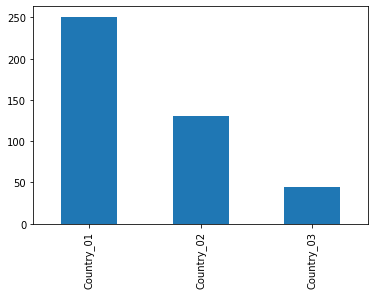

In [15]:
df.Countries.value_counts().plot(kind = 'bar')

* From above Pie chart, we can see that Country_01 is the most prone country to accidents follwed by Country_02, Country_03.

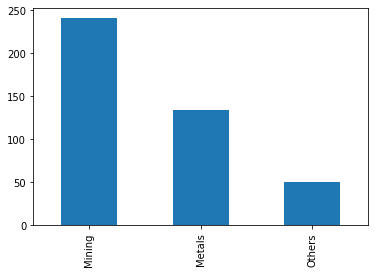

In [16]:
df['Industry Sector'].value_counts().plot(kind = 'bar')

* High count of Mining sector indicates that most accidents occurs from this sector.
* This gives a clear indication of Country_01 having many mining sites present

In [17]:
df.columns

Index(['Unnamed: 0', 'Data', 'Countries', 'Local', 'Industry Sector',
       'Accident Level', 'Potential Accident Level', 'Genre',
       'Employee or Third Party', 'Critical Risk', 'Description'],
      dtype='object')

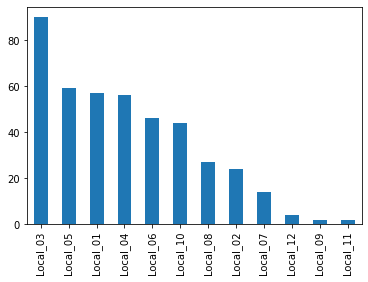

In [18]:
df['Local'].value_counts().plot(kind = 'bar')


* Local_03 having highest data
* Local_11 having lowest data


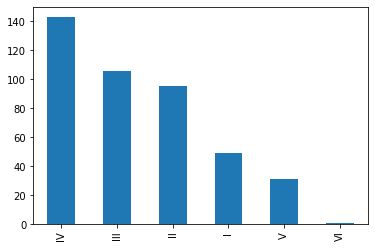

In [19]:
df['Potential Accident Level'].value_counts().plot(kind = 'bar')

* Potential Accident Level IV having the highest count
* VI having the least count
* There are 5 categories in Accident level, one less than Potential accident level

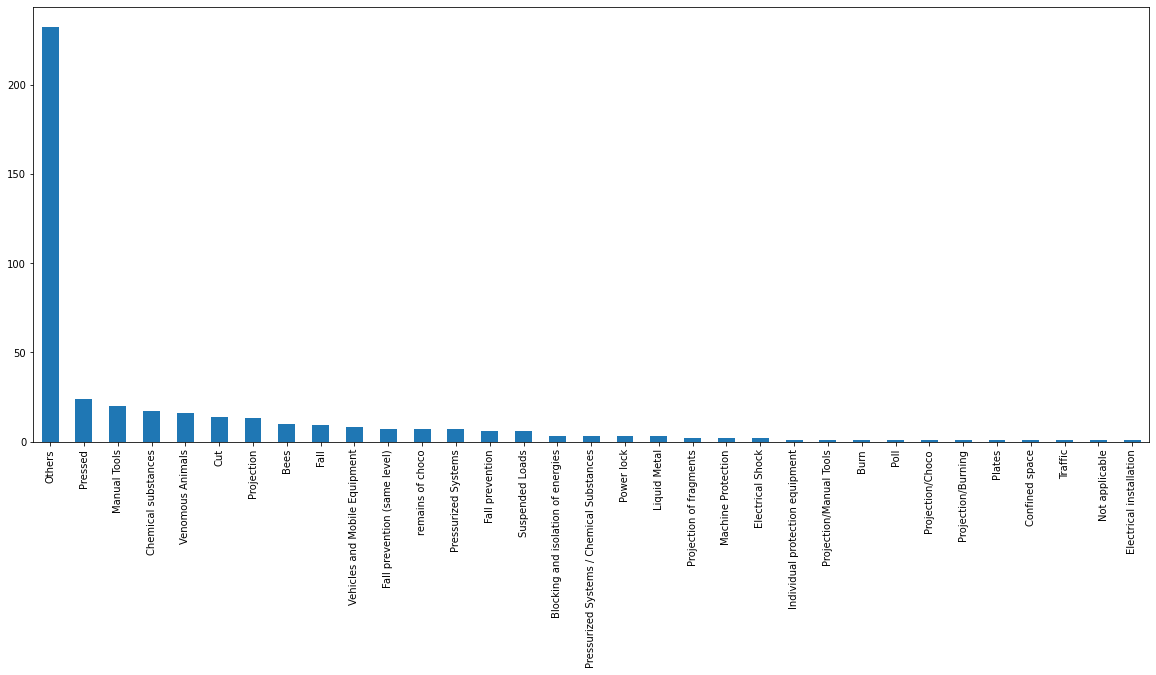

In [20]:
df['Critical Risk'].value_counts().plot(kind = 'bar', figsize = (20,8) )

* Others category having highest counts.
* Least is from Projection Manual tools, Burn, Poll, Projection/Choco, Projection/Burning, Plates, Confined Space, Traffic, Electrical Installation

**Bivariate Analysis**

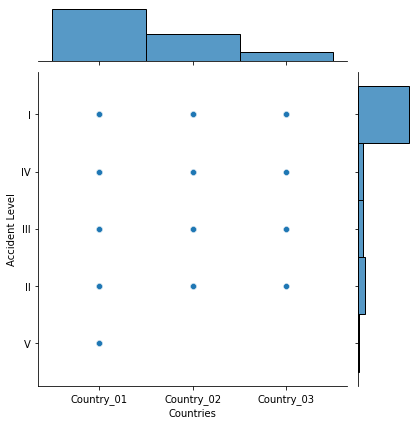

In [21]:
sns.jointplot(df['Countries'],df['Accident Level'])

* Country_01 with Accident Level I together having most accidents.

In [22]:
gkk = df.groupby(['Accident Level']).count()
gkk

,Unnamed: 0,Data,Countries,Local,Industry Sector,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
Accident Level,,,,,,,,,,
I,316,316,316,316,316,316,316,316,316,316
II,40,40,40,40,40,40,40,40,40,40
III,31,31,31,31,31,31,31,31,31,31
IV,30,30,30,30,30,30,30,30,30,30
V,8,8,8,8,8,8,8,8,8,8


* From above table we can see that most data present with Accident level I, followed by II, III, IV and V.
* During the model building process, we have to balance the target variable as we can see huge diffrence between I and other Accident Levels.

**Data Cleaning**

In [23]:
# Removing first column with name Unnamed: 0
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Data                      425 non-null    object
 1   Countries                 425 non-null    object
 2   Local                     425 non-null    object
 3   Industry Sector           425 non-null    object
 4   Accident Level            425 non-null    object
 5   Potential Accident Level  425 non-null    object
 6   Genre                     425 non-null    object
 7   Employee or Third Party   425 non-null    object
 8   Critical Risk             425 non-null    object
 9   Description               425 non-null    object
dtypes: object(10)
memory usage: 33.3+ KB


In [25]:
# checking for null values
df.isna().sum()

Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

* From above we can see there is no null values present in the data.

In [26]:
# Checking for duplicate values
df.duplicated().sum()

7

In [27]:
duplicates = df.duplicated()

In [28]:
df[duplicates]

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
77,2016-04-01 00:00:00,Country_01,Local_01,Mining,I,V,Male,Third Party (Remote),Others,In circumstances that two workers of the Abrat...
262,2016-12-01 00:00:00,Country_01,Local_03,Mining,I,IV,Male,Employee,Others,During the activity of chuteo of ore in hopper...
303,2017-01-21 00:00:00,Country_02,Local_02,Mining,I,I,Male,Third Party (Remote),Others,Employees engaged in the removal of material f...
345,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
346,2017-03-02 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,On 02/03/17 during the soil sampling in the re...
355,2017-03-15 00:00:00,Country_03,Local_10,Others,I,I,Male,Third Party,Venomous Animals,Team of the VMS Project performed soil collect...
397,2017-05-23 00:00:00,Country_01,Local_04,Mining,I,IV,Male,Third Party,Projection of fragments,In moments when the 02 collaborators carried o...


In [29]:
# dropping the duplicates
df.drop_duplicates(inplace = True)

In [30]:
df.shape

(418, 10)

* From above I am considering Description and critical risk as the input to the model(chat bot)
* So, I am going to combine the columns Critical Risk and Description.
* Target variable is Accident level 
* Removing all other Features/Columns

In [31]:
df.drop(['Data','Countries','Local','Industry Sector','Genre', 'Potential Accident Level','Employee or Third Party'], axis=1, inplace = True)

In [32]:
# Joining Critical risk and Description column
df.Description  = df[['Critical Risk','Description']].apply(lambda x: ' '.join(x), axis=1)

In [33]:
df.Description.head()

0    Pressed While removing the drill rod of the Ju...
1    Pressurized Systems During the activation of a...
2    Manual Tools In the sub-station MILPO located ...
3    Others Being 9:45 am. approximately in the Nv....
4    Others Approximately at 11:45 a.m. in circumst...
Name: Description, dtype: object

In [34]:
df_final = df[['Accident Level', 'Description']]

In [35]:
df_final

,Accident Level,Description
0,I,Pressed While removing the drill rod of the Ju...
1,I,Pressurized Systems During the activation of a...
2,I,Manual Tools In the sub-station MILPO located ...
3,I,Others Being 9:45 am. approximately in the Nv....
4,IV,Others Approximately at 11:45 a.m. in circumst...
...,...,...
420,I,Others Being approximately 5:00 a.m. approxima...
421,I,Others The collaborator moved from the infrast...
422,I,Venomous Animals During the environmental moni...
423,I,Cut The Employee performed the activity of str...


In [36]:
df_final['Description_Length'] = df_final.Description.str.len()

In [37]:
df_final

,Accident Level,Description,Description_Length
0,I,Pressed While removing the drill rod of the Ju...,465
1,I,Pressurized Systems During the activation of a...,327
2,I,Manual Tools In the sub-station MILPO located ...,327
3,I,Others Being 9:45 am. approximately in the Nv....,569
4,IV,Others Approximately at 11:45 a.m. in circumst...,494
...,...,...,...
420,I,Others Being approximately 5:00 a.m. approxima...,227
421,I,Others The collaborator moved from the infrast...,226
422,I,Venomous Animals During the environmental moni...,268
423,I,Cut The Employee performed the activity of str...,191


In [38]:
df_final['Accident Level'].value_counts()

I      309
II      40
III     31
IV      30
V        8
Name: Accident Level, dtype: int64

* We can see the imbalance in target variables, need to balance that
* Will going to balance by the help of smote oversampling technique.

**Pre Processing**
* Considering only alphabets
* Removing unwanted characters
* Converting text to lower case
* Removing unwanted space

In [39]:
# Selecting only alphabets
df_final.Description = df_final.Description.apply( lambda x: re.sub('[^A-Za-z]+', ' ',x))

In [40]:
# Converting text to lower case
df_final.Description = df_final.Description.apply(lambda x: x.lower())

In [41]:
# Removing unwanted space
df_final.Description = df_final.Description.apply(lambda x: x.strip())

In [42]:
from nltk.tokenize import word_tokenize
# Applying Lemmatizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#df_final.Description = df_final.Description.apply(lambda x: lemmatize(x))
def preprocess(text):
  corpus = []
  lemmatizer = WordNetLemmatizer()
  for lines in text:
    words = word_tokenize(lines)
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(w) for w in words if len(w) > 2]
    corpus.append(words)
  return corpus

In [43]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
df_final_preprocessing  = preprocess(df_final.Description)

In [45]:
df_final_preprocessing

[['pressed',
  'removing',
  'drill',
  'rod',
  'jumbo',
  'maintenance',
  'supervisor',
  'proceeds',
  'loosen',
  'support',
  'intermediate',
  'centralizer',
  'facilitate',
  'removal',
  'seeing',
  'mechanic',
  'support',
  'one',
  'end',
  'drill',
  'equipment',
  'pull',
  'hand',
  'bar',
  'accelerate',
  'removal',
  'moment',
  'bar',
  'slide',
  'point',
  'support',
  'tightens',
  'finger',
  'mechanic',
  'drilling',
  'bar',
  'beam',
  'jumbo'],
 ['pressurized',
  'system',
  'activation',
  'sodium',
  'sulphide',
  'pump',
  'piping',
  'uncoupled',
  'sulfide',
  'solution',
  'designed',
  'area',
  'reach',
  'maid',
  'immediately',
  'made',
  'use',
  'emergency',
  'shower',
  'directed',
  'ambulatory',
  'doctor',
  'later',
  'hospital',
  'note',
  'sulphide',
  'solution',
  'gram',
  'liter'],
 ['manual',
  'tool',
  'sub',
  'station',
  'milpo',
  'located',
  'level',
  'collaborator',
  'excavation',
  'work',
  'pick',
  'hand',
  'tool',
 

In [46]:
print('Minimum line length: {}'.format(df_final['Description_Length'].min()))
print('Maximum line length: {}'.format(df_final['Description_Length'].max()))
#print('Line with maximum length: {}'.format(df_final[df_final['line_length'] == df_final['line_length'].max()]['Cleaned_Description'].values[0]))

Minimum line length: 99
Maximum line length: 1034


In [47]:
# Using label encoder for Accident level
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_final['Accident Level']= label_encoder.fit_transform(df_final['Accident Level'])
df_final

,Accident Level,Description,Description_Length
0,0,pressed while removing the drill rod of the ju...,465
1,0,pressurized systems during the activation of a...,327
2,0,manual tools in the sub station milpo located ...,327
3,0,others being am approximately in the nv cx ob ...,569
4,3,others approximately at a m in circumstances t...,494
...,...,...,...
420,0,others being approximately a m approximately w...,227
421,0,others the collaborator moved from the infrast...,226
422,0,venomous animals during the environmental moni...,268
423,0,cut the employee performed the activity of str...,191


In [59]:
df_final['Accident Level'].value_counts()

0    309
1     40
2     31
3     30
4      8
Name: Accident Level, dtype: int64

In [48]:
# Using smote technique to balance the target variable
from imblearn.over_sampling import SMOTE

In [49]:
X = df_final['Description']
Y = df_final['Accident Level']

In [53]:
#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)
count_vect = CountVectorizer(ngram_range=(1,3))
count_vect.fit(X)
X_new_vector = count_vect.transform(X)
print(X_new_vector)


  (0, 70)	1
  (0, 71)	1
  (0, 72)	1
  (0, 997)	3
  (0, 998)	1
  (0, 999)	1
  (0, 1589)	1
  (0, 1595)	1
  (0, 1666)	1
  (0, 1667)	1
  (0, 2464)	1
  (0, 2604)	1
  (0, 2605)	1
  (0, 2876)	3
  (0, 2877)	2
  (0, 2878)	1
  (0, 2880)	1
  (0, 2900)	1
  (0, 2901)	1
  (0, 3019)	1
  (0, 3032)	1
  (0, 3033)	1
  (0, 3285)	1
  (0, 3292)	1
  (0, 3303)	1
  :	:
  (417, 24949)	1
  (417, 24950)	1
  (417, 25309)	1
  (417, 25316)	1
  (417, 25317)	1
  (417, 25919)	6
  (417, 26094)	1
  (417, 26100)	1
  (417, 26429)	1
  (417, 26431)	1
  (417, 26784)	1
  (417, 26785)	1
  (417, 27286)	2
  (417, 27306)	1
  (417, 27310)	1
  (417, 27855)	1
  (417, 27856)	1
  (417, 30504)	2
  (417, 30540)	1
  (417, 30542)	1
  (417, 30996)	1
  (417, 31030)	1
  (417, 33465)	1
  (417, 33672)	1
  (417, 33673)	1


In [55]:
print(X_new_vector.shape)

(418, 34921)


* Using Smote for oversampling.

In [61]:
strategy = {0:350, 1:180, 2:200, 3:200, 4:150}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X_new_vector, Y)

In [63]:
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
df_processed = pd.DataFrame(X.toarray(), columns = count_vect.get_feature_names_out())

In [66]:
df_processed

,abb,abb furnace,abb furnace cat,abdomen,abdomen on,abdomen on the,able,able to,able to position,able to remove,about,about below,about below the,about cm,about cm below,about cm from,about cm in,about five,about five meters,about km,about km hour,about meters,about meters looking,about meters to,about mt,about mt at,about mt of,about seven,about seven meters,about this,about this finding,about to,about to end,about to fall,about to open,above,above his,above his safety,above the,above the door,...,zinc,zinc concentrate,zinc concentrate the,zinc in,zinc in his,zinc in the,zinc of,zinc of the,zinc powder,zinc powder container,zinc pump,zinc pump from,zinc sheet,zinc sheet adhered,zinc sheet from,zinc stuck,zinc stuck so,zinc two,zinc two mechanics,zinco,zinco on,zinco on the,zn,zn ingot,zn ingot it,zn sheets,zn sheets during,zone,zone from,zone from the,zone in,zone in moments,zone intersection,zone intersection rpa,zone of,zone of lifting,zone the,zone the victim,zone with,zone with the
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1077,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
df_processed.shape

(1080, 34921)

In [68]:
df_target = pd.DataFrame(Y)

In [69]:
df_to_be_executed = pd.concat([df_processed, df_target], axis=1)


In [71]:
df_to_be_executed.head(5)

,abb,abb furnace,abb furnace cat,abdomen,abdomen on,abdomen on the,able,able to,able to position,able to remove,about,about below,about below the,about cm,about cm below,about cm from,about cm in,about five,about five meters,about km,about km hour,about meters,about meters looking,about meters to,about mt,about mt at,about mt of,about seven,about seven meters,about this,about this finding,about to,about to end,about to fall,about to open,above,above his,above his safety,above the,above the door,...,zinc concentrate,zinc concentrate the,zinc in,zinc in his,zinc in the,zinc of,zinc of the,zinc powder,zinc powder container,zinc pump,zinc pump from,zinc sheet,zinc sheet adhered,zinc sheet from,zinc stuck,zinc stuck so,zinc two,zinc two mechanics,zinco,zinco on,zinco on the,zn,zn ingot,zn ingot it,zn sheets,zn sheets during,zone,zone from,zone from the,zone in,zone in moments,zone intersection,zone intersection rpa,zone of,zone of lifting,zone the,zone the victim,zone with,zone with the,Accident Level
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0


**Below actions has been performed for making the final data to be executed by the models:**
* Considering only alphabets, excluding numbers
* Removing unwanted characters
* Converting text to lower case
* Removing unwanted space
* Used count_vectorizer() for converting the text to arrays.

In [72]:
df_to_be_executed.to_csv("Cleaned_Data.csv")